INTRODUCTION: 

This dataset examines factors related to sleeping disorders such as insomnia and sleep apnea. It includes columns for sleep duration, sleep quality, stress level, age, heart rate, physical activity level, and more. These factors help determine whether individuals surveyed have no sleep disorder, insomnia, or sleep apnea. Insomnia refers to difficulties falling or staying asleep, leading to insufficient or poor-quality sleep. Sleep apnea involves breathing pauses during sleep, leading to disrupted sleep patterns and potential health risks.


The question we will be answering is based on our personal data, does a sleep disorder persist and if so which one? This is an important question for us to explore as we could possible identify and work towards finding a diagnosis for ourselves. This could lead to lifestyle changes that would give us an overall better quailty of life.




In [72]:
### Loading necessary libraries needed to tidy and wrangle our dataset. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

PRELIMINARY EXPLORATORY DATA ANALYSIS:

## Reading dataset into R
sleep <- read_csv("https://raw.githubusercontent.com/mikkielynn/DSCI_100_project/main/Sleep_health_and_lifestyle_dataset.csv")
head(sleep)

In [73]:
# Tidying our dataset: Renaming variable names to make the data easier to work with and apply functions to for manipulation. 
colnames(sleep) <- c("Person_ID", "Gender", "Age", "Occupation", "Sleep_Duration", "Quality_of_sleep", "Physical_Activity_Level", "Stress_Level", "BMI", "Blood_Pressure", "Heart_Rate", "Daily_steps", "Sleep_disorder")
sleep

Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,BMI,Blood_Pressure,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


WHICH COLUMNS WE ARE CHOOSING TO ANALYZE AND WHY:

In [74]:
# Tidied data; selected columns used for analysis
sleep_2 <- sleep |>
    select(-Person_ID, -Gender, -Occupation, -BMI, -Blood_Pressure) |>
    mutate(Sleep_disorder = as.factor(Sleep_disorder))
sleep_2

Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
27,6.1,6,42,6,77,4200,None
28,6.2,6,60,8,75,10000,None
28,6.2,6,60,8,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea


- PERFORMING SUMMARY STATISTICS ON OUR TRAINING DATA:

In [75]:
#splitting our data into a testing set and a training set
sleep_split <- initial_split(sleep_2, prop = 0.5, strata = Sleep_disorder)
sleep_train <- training(sleep_split)
sleep_test <- testing(sleep_split)
sleep_train     
sleep_test

#ensuring we have equal proportions of the different lables for the sleep disorder
sleep_train |>
    count(Sleep_disorder)

sleep_test |>
    count(Sleep_disorder)

Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,5.9,4,30,8,85,3000,Insomnia
33,6.0,6,30,8,72,5000,Insomnia
36,7.2,8,60,4,68,7000,Insomnia
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.0,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea


Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps,Sleep_disorder
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
27,6.1,6,42,6,77,4200,None
28,6.2,6,60,8,75,10000,None
28,5.9,4,30,8,85,3000,Sleep Apnea
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,8.0,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea
59,8.1,9,75,3,68,7000,Sleep Apnea


Sleep_disorder,n
<fct>,<int>
Insomnia,38
None,109
Sleep Apnea,39


Sleep_disorder,n
<fct>,<int>
Insomnia,39
None,110
Sleep Apnea,39


In [76]:
#calculating the percentge of each sleep disorder in our training data to give us an overview of the data we are working with
num_obs <- nrow(sleep_2)
sleep_train |>
  group_by(Sleep_disorder) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

Sleep_disorder,count,percentage
<fct>,<int>,<dbl>
Insomnia,38,10.16043
None,109,29.14439
Sleep Apnea,39,10.42781


In [77]:
# Summarizing means across quantitative variables for our training data
sleep_summary <- sleep_train |>
    summarize(across(Age:Daily_steps, mean))
sleep_summary

Age,Sleep_Duration,Quality_of_sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_steps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41.35484,7.097849,7.231183,58.04301,5.478495,70.34946,6698.387


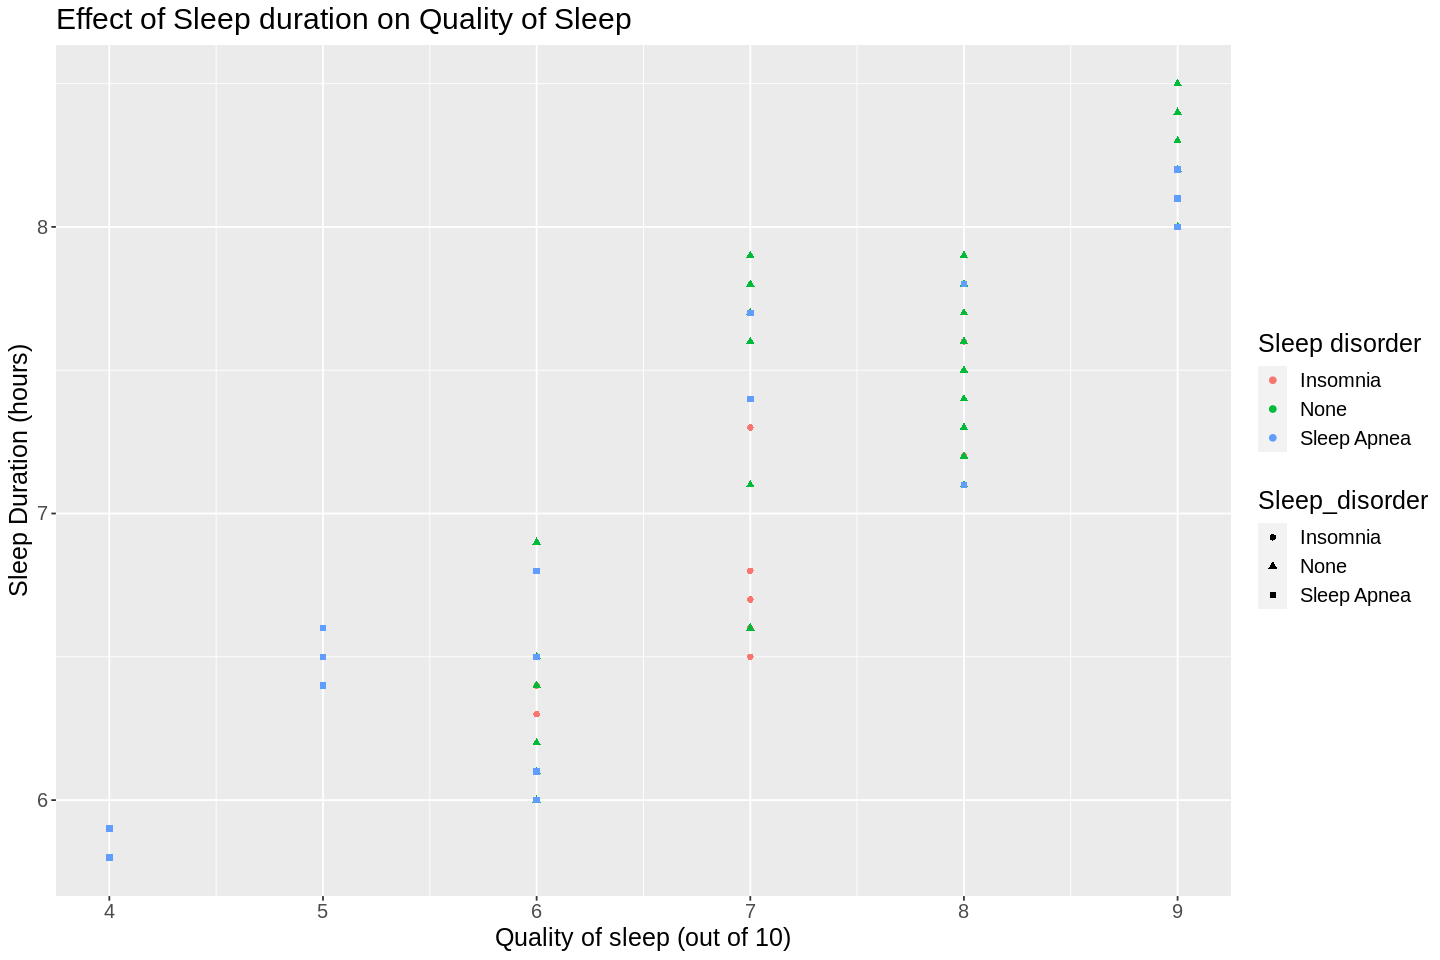

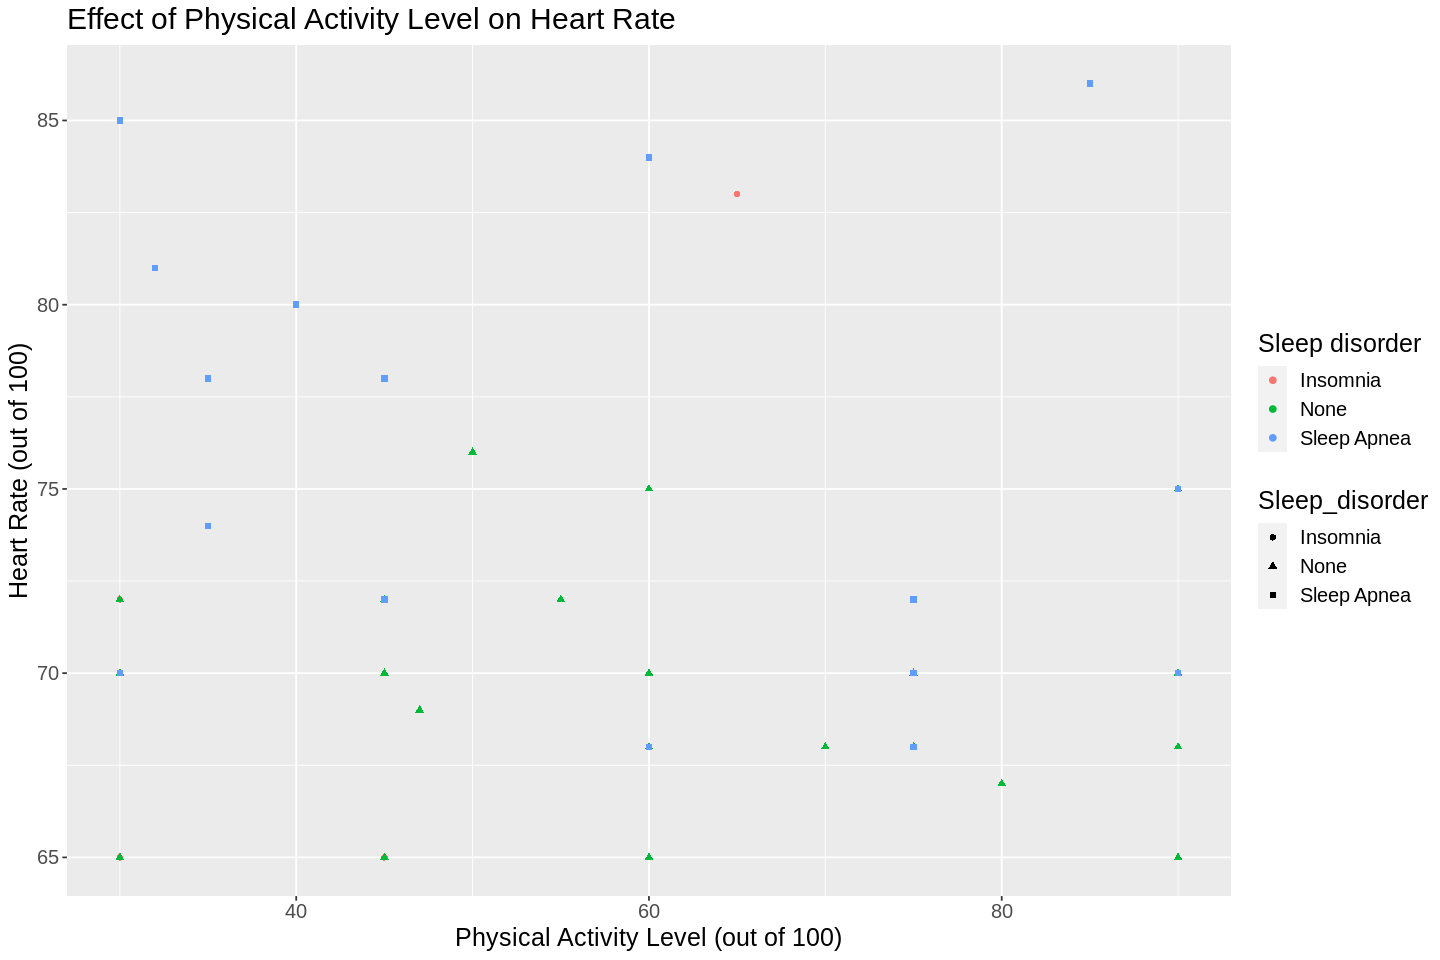

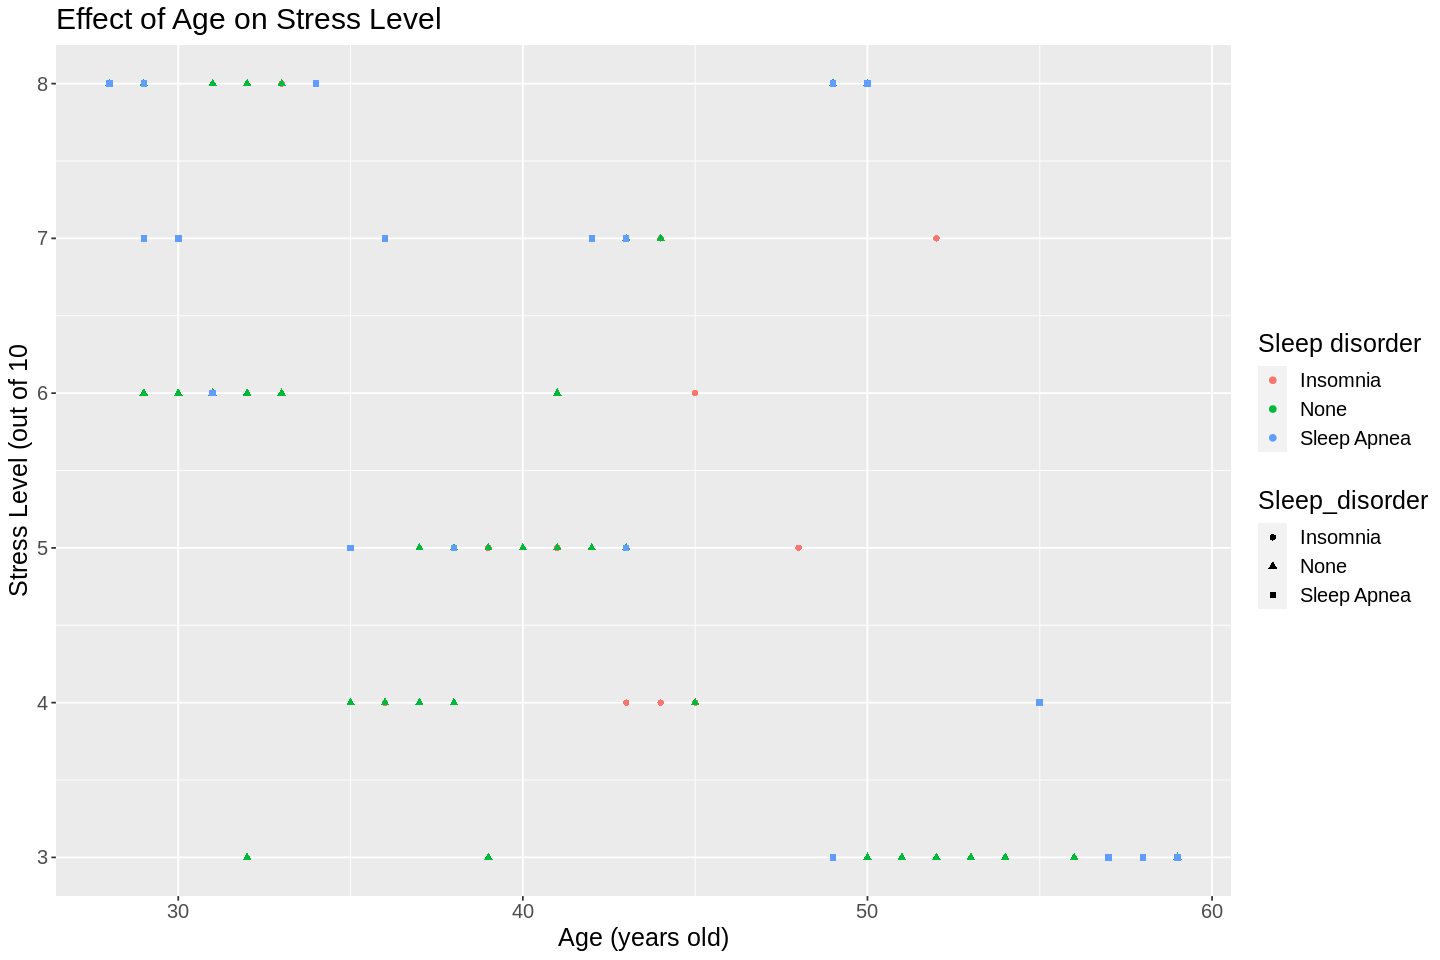

In [78]:
options(repr.plot.width = 12, repr.plot.height = 8)

sleep_quality_duration <- sleep_train |> 
    ggplot(aes(x = Quality_of_sleep, y = Sleep_Duration, colour = Sleep_disorder, shape = Sleep_disorder)) +
        geom_point() + 
        labs(x = "Quality of sleep (out of 10)",
             y = "Sleep Duration (hours)", 
             colour = "Sleep disorder", 
             title = "Effect of Sleep duration on Quality of Sleep") +
        theme(text = element_text(size = 15))
        
sleep_quality_duration

sleep_heart_exercise <- sleep_train |> 
    ggplot(aes(x = Physical_Activity_Level, y = Heart_Rate, colour = Sleep_disorder, shape = Sleep_disorder)) +
        geom_point() + 
        labs(x = "Physical Activity Level (out of 100)",
             y = "Heart Rate (out of 100)", 
             colour = "Sleep disorder", 
             title = "Effect of Physical Activity Level on Heart Rate") +
        theme(text = element_text(size = 15))

sleep_heart_exercise

options(repr.plot.width = 12, repr.plot.height = 8)

sleep_age_stress <- sleep_train |> 
    ggplot(aes(x = Age, y = Stress_Level, colour = Sleep_disorder, shape = Sleep_disorder)) +
        geom_point() + 
        labs(x = "Age (years old)",
             y = "Stress Level (out of 10", 
             colour = "Sleep disorder", 
             title = "Effect of Age on Stress Level") +
        theme(text = element_text(size = 15))

sleep_age_stress

METHODS:  
    
**note graphs were based off of training data which is 50% of the entire dataset.

We will be using the K-nearest neighbour algorithm to analyze our data by first standardizing all variables using both bake() and recipe(). Afterwards, we will split the dataset into a testing and training subset and perform cross-validation on the training set to determine the best K for our model. After testing our model for accuracy we will then input the new data points to determine whether a sleep disorder persists based on our personal data, and if so which one?

From the original dataset, we decided to consider six variables accessed in the sleep_2 dataset. This decision was made because all of heart health, mental health, and sleep affect one's chances of developing a sleep disorder. REM (rapid eye movement) is crucial to harness cognitive functions like memory consolidation, and studies show that longer durations and higher quality of sleep increases this REM period. This can be seen from the plot above, as those with over seven hours of sleep and better quality (above seven) were not classified to have insomnia. Additionally, there are many benefits of exercise on heart health as it helps maintain risk factors for heart disease. Exercise plays the role of a beta blocker, which blocks the release of the hormone epinephrine. This slows the heart rate and lowers blood pressure, which reduces one’s chances of going into cardiac arrest. Younger age groups, including young adults, experience higher stress levels compared to older age groups. Factors such as pre-existing anxiety, disruptions in education and social interactions, and higher unemployment rates contribute to their stress. Older adults generally perceive events as less stressful due to better emotional regulation and previous crisis experiences.

EXPECTED OUTCOMES AND SIGNIFICANCE:
    
In the analysis, we anticipate uncovering patterns and trends related to sleep disorders. The dataset includes diagnosis of sleep apnea, insomnia, and no sleep disorder. Our training data indicates that most of the sampled population has no sleep disorder, however, the difference between insomnia and sleep apnea can be further distinguished

By examining various qualities of sleep, we can better comprehend the wide spectrum of sleep disorders and their distinct effects on individuals.

Following questions we could: What are the impacts of sleep disorders on daily life? How can sleep disorders be treated? Are sleep disorders genetically predetermined?

Here we perform cross-validation with v = 5 to determine the best k value to use for our classification model. Using a sequence of 1 to 10 by one unit, we can determine which neighbor value generates the best prediction accuracy and use the determined value to use our model on the sleep testing data set. 

In [79]:
# cross validation with 5 vfold
sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("classification") 

sleep_recipe <- recipe(Sleep_disorder ~ Sleep_Duration + Quality_of_sleep, data = sleep_train) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = Sleep_disorder)

# testing model on sleep training set with k = 1 to 10
gridvals <- tibble(neighbors = 1:10)
sleep_results <- workflow() |> 
    add_recipe(sleep_recipe) |> 
    add_model(sleep_spec) |>
    tune_grid(resamples = sleep_vfold, grid = gridvals) |> 
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean)) |>
    slice(1)
sleep_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,multiclass,0.779748,5,0.01681425,Preprocessor1_Model05


In [80]:
# pulling the best k value
k_value <- sleep_results |>
    pull(neighbors)

# retrain on entire sleep training set
new_sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_value) |>
      set_engine("kknn") |>
      set_mode("classification") 

new_sleep_fit <- workflow() |>
    add_recipe(sleep_recipe) |>
    add_model(new_sleep_spec) |>
    fit(data = sleep_train)

In [81]:
# determining model prediction accuracy
sleep_prediction_accuracy <- predict(new_sleep_fit, sleep_test) |>
    bind_cols(sleep_test) |>
    metrics(truth = Sleep_disorder, estimate = .pred_class) |>
    slice(1) |>
    pull(.estimate)
sleep_prediction_accuracy

[1] 0.8031915

In [87]:
# binding the new observation to our sleep_2 dataset
personal_1 <- data.frame(20, 6.5, 6.5, 30, 9, 90, 3500, "")
names(personal_1) <- c("Age", 
                       "Sleep_Duration", 
                       "Quality_of_sleep",
                       "Physical_Activity_Level",
                       "Stress_Level",
                       "Heart_Rate",
                       "Daily_steps",
                       "Sleep_disorder")
sleep_final <- rbind(sleep_2, personal_1)

# predict sleep disorder based on new observation
personal_prediction <- predict(new_sleep_fit, personal_1)
personal_prediction

.pred_class
<fct>
Insomnia


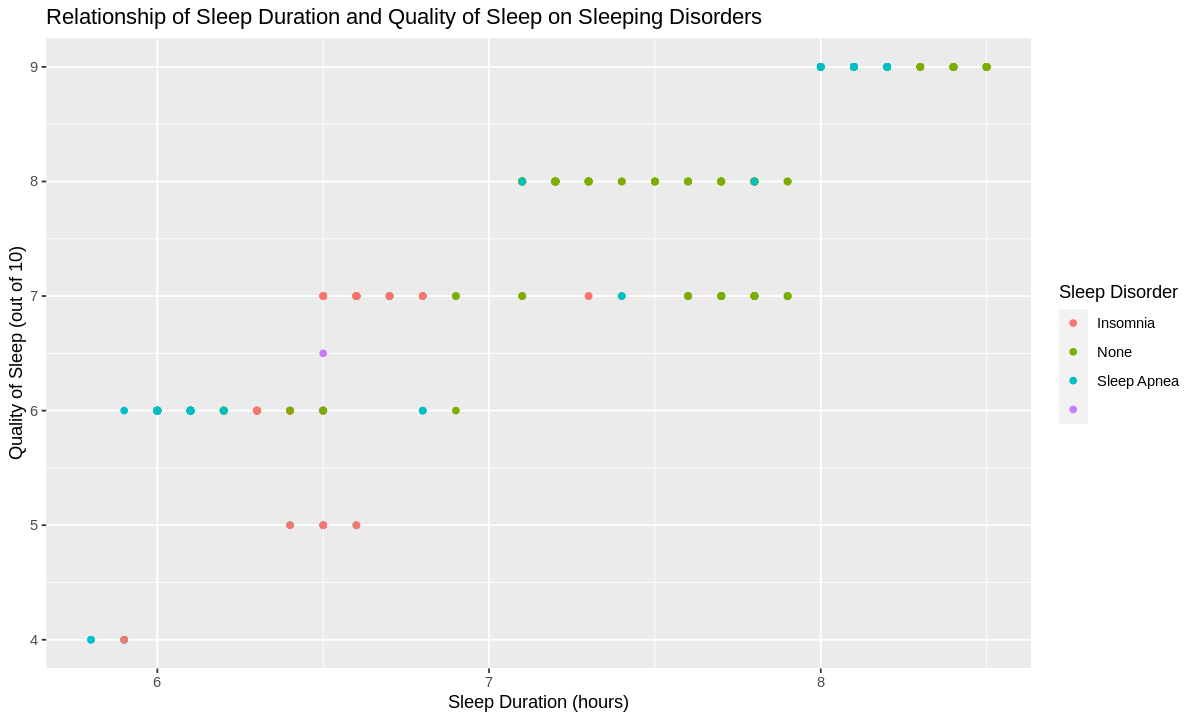

In [89]:
# plotting the new prediction with final_sleep data set
options(repr.plot.width=10, repr.plot.height=6)
personal_plot <- sleep_final |>
    ggplot(aes(x = Sleep_Duration, y = Quality_of_sleep, color = Sleep_disorder)) +
    geom_point() +
    labs(x = "Sleep Duration (hours)", y = "Quality of Sleep (out of 10)", color = "Sleep Disorder") +
    ggtitle("Relationship of Sleep Duration and Quality of Sleep on Sleeping Disorders")
personal_plot